In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.preprocess import *
from utils.model import *

# Read data

In [6]:
y = read_target_train()

In [3]:
train_data = read_data('train')

In [4]:
test_data = read_data('test')

# Preprocess data

In [7]:
X, X_test = read_preprocessed_data()

# Train catboost

In [10]:
from catboost import CatBoostRegressor

In [13]:
model_tst = CatBoostRegressor(iterations = 500, verbose = 100, random_state = config['random_state'])
model_C = CatBoostRegressor(iterations = 500, verbose = 100, random_state = config['random_state'])

In [12]:
cross_val(X, y, model_tst, model_C)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.245535
0:	learn: 28.5044613	total: 823ms	remaining: 1m 21s


KeyboardInterrupt: 

In [14]:
model_tst.fit(X, y['TST'])

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Learning rate set to 0.075191
0:	learn: 30.0113082	total: 847ms	remaining: 7m 2s
100:	learn: 16.9500514	total: 1m 35s	remaining: 6m 18s
200:	learn: 11.1194827	total: 3m 24s	remaining: 5m 4s
300:	learn: 7.2883634	total: 5m 10s	remaining: 3m 25s
400:	learn: 4.8441255	total: 6m 33s	remaining: 1m 37s
499:	learn: 3.2512960	total: 7m 42s	remaining: 0us


In [15]:
model_C.fit(X, y['C'])

Learning rate set to 0.075191
0:	learn: 0.0978188	total: 882ms	remaining: 7m 19s
100:	learn: 0.0269095	total: 1m 56s	remaining: 7m 40s
200:	learn: 0.0167477	total: 3m 51s	remaining: 5m 44s
300:	learn: 0.0106271	total: 5m 49s	remaining: 3m 51s
400:	learn: 0.0070548	total: 7m 42s	remaining: 1m 54s
499:	learn: 0.0047133	total: 9m 37s	remaining: 0us


In [16]:
save_catboost_models(model_tst, model_C)

<BarContainer object of 15 artists>

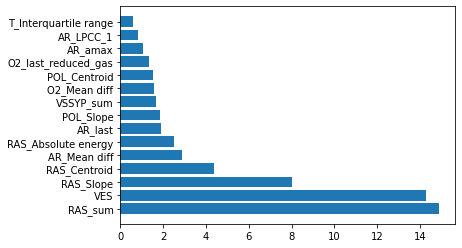

In [18]:
args = model_C.feature_importances_.argsort()[::-1][:15]
plt.barh(np.array(model_C.feature_names_)[args], model_C.feature_importances_[args]) 
